# ==========================================
# UBER & LYFT PRICE ANALYSIS
# Dataset: Kaggle (693k cab rides + weather)
# Goal: Compare prices, analyze surge pricing, weather impact
# ==========================================
# https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices
# ==========================================
# IMPORTS
# ==========================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries are downloaded')



Libraries are downloaded


# ==========================================
# БЛОК 1: ЗАГРУЗКА ДАННЫХ
# ==========================================


In [2]:
# Загрузи cab_rides.csv
rides = pd.read_csv('data/cab_rides.csv')

# Загрузи weather.csv
weather = pd.read_csv('data/weather.csv')

print("📊 Датасеты загружены")
print(f"Rides: {rides.shape}")
print(f"Weather: {weather.shape}")

📊 Датасеты загружены
Rides: (693071, 10)
Weather: (6276, 8)


# ==========================================
# БЛОК 1.1: ИЗУЧАЕМ RIDES
# ==========================================

In [3]:

print("📊 RIDES DATASET")
print("="*90)

# Первые 5 строк
print("\n🔍 Первые строки:")
rides.head()


📊 RIDES DATASET

🔍 Первые строки:


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
print("\n📋 Информация о колонках:")
rides.info()



📋 Информация о колонках:
<class 'pandas.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  str    
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  str    
 4   source            693071 non-null  str    
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  str    
 8   product_id        693071 non-null  str    
 9   name              693071 non-null  str    
dtypes: float64(3), int64(1), str(6)
memory usage: 52.9 MB


In [5]:
print("\n📈 Статистика:")
rides.describe()


📈 Статистика:


,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [6]:
print("\n⚠️ Missing values:")
missing = rides.isnull().sum()
print(missing[missing > 0])


⚠️ Missing values:
price    55095
dtype: int64


# ==========================================
# БЛОК 1.2: ИЗУЧАЕМ WEATHER
# ==========================================

In [7]:

print("📊 Weather DATASET")
print("="*90)

# Первые 5 строк
print("\n🔍 Первые строки:")
weather.head()

📊 Weather DATASET

🔍 Первые строки:


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [8]:
print("\n📋 Информация о колонках:")
weather.info()


📋 Информация о колонках:
<class 'pandas.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   str    
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), str(1)
memory usage: 392.4 KB


In [9]:
print("\n📈 Статистика:")
weather.describe().round(2)


📈 Статистика:


,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.00,6276.00,6276.00,894.00,6.276000e+03,6276.00,6276.00
mean,39.09,0.68,1008.45,0.06,1.543857e+09,0.76,6.80
std,6.02,0.31,12.87,0.10,6.659340e+05,0.13,3.63
min,19.62,0.00,988.25,0.00,1.543204e+09,0.45,0.29
25%,36.08,0.44,997.75,0.00,1.543387e+09,0.67,3.52
50%,40.13,0.78,1007.66,0.01,1.543514e+09,0.76,6.57
75%,42.83,0.97,1018.48,0.06,1.544691e+09,0.89,9.92
max,55.41,1.00,1035.12,0.78,1.545159e+09,0.99,18.18


In [10]:
print("\n⚠️ Missing values:")
missing_weather = weather.isnull().sum()
print(missing_weather[missing_weather > 0])


⚠️ Missing values:
rain    5382
dtype: int64


In [11]:
# ==========================================
# БЛОК 1.3: Приводим данные в порядок
# ==========================================

In [12]:
weather['time_stamp'] = pd.to_datetime(weather['time_stamp'], unit='s')
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,2018-12-16 23:45:01,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,2018-12-16 23:45:01,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,2018-12-16 23:45:01,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,2018-12-16 23:45:01,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,2018-12-16 23:45:01,0.75,11.49


In [13]:
rides['time_stamp'] = pd.to_datetime(rides['time_stamp'], unit='ms')
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [14]:
rides['year'] = rides['time_stamp'].dt.year
rides['month'] = rides['time_stamp'].dt.month
rides['month_name'] = rides['time_stamp'].dt.month_name()
rides['day'] = rides['time_stamp'].dt.day
rides['day_name'] = rides['time_stamp'].dt.day_name()




In [15]:
rides['price'] = rides['price'].fillna(rides.groupby('name')['price'].transform('median'))
rides['price'] = rides['price'].fillna(rides['price'].median())

In [16]:
weather['rain'] = weather['rain'].fillna(weather['rain'].median())

In [17]:
weather.tail(10)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
6266,44.85,Boston University,0.89,1000.70,0.01485,2018-12-03 06:52:54,0.95,1.52
6267,44.83,Fenway,0.88,1000.70,0.01485,2018-12-03 06:52:54,0.96,1.53
6268,44.80,Financial District,0.89,1000.70,0.01485,2018-12-03 06:52:54,0.96,1.53
6269,44.75,Haymarket Square,0.89,1000.69,0.01485,2018-12-03 06:52:54,0.96,1.53
6270,44.77,North End,0.89,1000.69,0.01485,2018-12-03 06:52:54,0.96,1.53
6271,44.72,North Station,0.89,1000.69,0.01485,2018-12-03 06:52:54,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,0.01485,2018-12-03 06:52:54,0.96,1.54
6273,44.82,South Station,0.89,1000.70,0.01485,2018-12-03 06:52:54,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,0.01485,2018-12-03 06:52:54,0.96,1.54
6275,44.69,West End,0.89,1000.70,0.01485,2018-12-03 06:52:54,0.96,1.52


In [18]:
rides.tail(10)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,year,month,month_name,day,day_name
693061,1.61,Uber,2018-12-02 05:28:04.149,Haymarket Square,Theatre District,15.0,1.0,54362c72-124b-47e8-8d07-62a07cfff624,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018,12,December,2,Sunday
693062,1.61,Uber,2018-12-02 05:28:04.149,Haymarket Square,Theatre District,15.0,1.0,64a50889-d05b-49de-b416-1802db5c27ac,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018,12,December,2,Sunday
693063,1.61,Uber,2018-12-02 05:28:04.149,Haymarket Square,Theatre District,27.0,1.0,6c1d9207-a9af-431e-a65f-3d9d205f28bf,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018,12,December,2,Sunday
693064,1.00,Uber,2018-12-02 05:28:04.149,North End,West End,17.0,1.0,25ed29df-4f9c-4aac-8218-681427f1d738,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018,12,December,2,Sunday
693065,1.00,Uber,2018-12-01 23:53:05.534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018,12,December,1,Saturday
693066,1.00,Uber,2018-12-01 23:53:05.534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018,12,December,1,Saturday
693067,1.00,Uber,2018-12-01 23:53:05.534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018,12,December,1,Saturday
693068,1.00,Uber,2018-12-01 23:53:05.534,North End,West End,13.5,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018,12,December,1,Saturday
693069,1.00,Uber,2018-12-01 23:53:05.534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018,12,December,1,Saturday
693070,1.00,Uber,2018-12-01 23:53:05.534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,2018,12,December,1,Saturday


In [19]:
rides['hour'] = rides['time_stamp'].dt.floor('h')
weather['hour'] = weather['time_stamp'].dt.floor('h')

merged = rides.merge(
    weather,
    left_on=['source', 'hour'],
    right_on=['location', 'hour'],
    how='left'
)

print(f'Успех! Merged: {len(merged)} строк')
print(f'Rides с погодой: {merged['temp'].notna().sum()}')

Успех! Merged: 1268639 строк
Rides с погодой: 1265675


In [20]:
print("🔍 Проверка дубликатов в weather:")
duplicates = weather.groupby(['location', 'hour']).size()

print(f"Максимум записей на (location, hour): {duplicates.max()}")
print(f"Среднее записей: {duplicates.mean():.2f}")

🔍 Проверка дубликатов в weather:
Максимум записей на (location, hour): 15
Среднее записей: 1.58


In [21]:
weather_clean = weather.drop_duplicates(subset=['location', 'hour'], keep='first')

print(f"\nДо удаления: {len(weather)} строк")
print(f"После: {len(weather_clean)} строк")


До удаления: 6276 строк
После: 3960 строк


In [22]:
merged = rides.merge(
    weather_clean,
    left_on=['source', 'hour'],
    right_on=['location', 'hour'],
    how='left'
)

print(f"\n✅ Merge результат:")
print(f"Merged: {len(merged)} строк")
print(f"Rides с погодой: {merged['temp'].notna().sum()}")


✅ Merge результат:
Merged: 693071 строк
Rides с погодой: 690107


In [23]:
merged.shape

(693071, 24)

In [24]:
merged.info()

<class 'pandas.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   distance          693071 non-null  float64       
 1   cab_type          693071 non-null  str           
 2   time_stamp_x      693071 non-null  datetime64[ms]
 3   destination       693071 non-null  str           
 4   source            693071 non-null  str           
 5   price             693071 non-null  float64       
 6   surge_multiplier  693071 non-null  float64       
 7   id                693071 non-null  str           
 8   product_id        693071 non-null  str           
 9   name              693071 non-null  str           
 10  year              693071 non-null  int32         
 11  month             693071 non-null  int32         
 12  month_name        693071 non-null  str           
 13  day               693071 non-null  int32         
 14  day_name       

In [25]:
merged.describe()

,distance,time_stamp_x,price,surge_multiplier,year,month,day,hour,temp,clouds,pressure,rain,time_stamp_y,humidity,wind
count,693071.000000,693071,693071.000000,693071.000000,693071.0,693071.000000,693071.000000,693071,690107.000000,690107.000000,690107.000000,690107.000000,690107,690107.000000,690107.000000
mean,2.189430,2018-12-05 21:35:09.764000,16.303056,1.013870,2018.0,11.586684,17.794365,2018-12-05 21:05:48.161000,39.223792,0.668018,1010.230103,0.018358,2018-12-05 21:47:29,0.747361,6.917405
min,0.020000,2018-11-26 03:40:46.318000,2.500000,1.000000,2018.0,11.000000,1.000000,2018-11-26 03:00:00,19.620000,0.000000,988.250000,0.000200,2018-11-26 03:40:44,0.450000,0.300000
25%,1.280000,2018-11-28 22:26:08.356000,9.500000,1.000000,2018.0,11.000000,13.000000,2018-11-28 22:00:00,36.110000,0.430000,999.950000,0.014850,2018-11-28 22:02:09,0.650000,3.630000
50%,2.160000,2018-12-02 07:57:57.529000,13.500000,1.000000,2018.0,12.000000,17.000000,2018-12-02 07:00:00,40.180000,0.760000,1009.550000,0.014850,2018-12-02 07:52:54,0.730000,6.740000
75%,2.920000,2018-12-14 22:45:08.976000,22.500000,1.000000,2018.0,12.000000,28.000000,2018-12-14 22:00:00,43.600000,0.960000,1021.870000,0.014850,2018-12-14 22:45:02,0.870000,9.880000
max,7.860000,2018-12-18 19:15:10.943000,97.500000,3.000000,2018.0,12.000000,30.000000,2018-12-18 19:00:00,55.410000,1.000000,1035.120000,0.274000,2018-12-18 18:45:02,0.990000,18.180000
std,1.138937,NaN,8.983913,0.091641,0.0,0.492429,9.982286,NaN,6.600050,0.313844,13.381050,0.024373,NaN,0.128987,3.648940


In [26]:
merged.head()

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,day_name,hour,temp,location,clouds,pressure,rain,time_stamp_y,humidity,wind
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Sunday,2018-12-16 09:00:00,38.46,Haymarket Square,0.29,1022.25,0.01485,2018-12-16 09:45:01,0.76,7.68
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,Tuesday,2018-11-27 02:00:00,44.31,Haymarket Square,1.00,1003.17,0.11230,2018-11-27 02:15:20,0.90,13.69
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,Wednesday,2018-11-28 01:00:00,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,Friday,2018-11-30 04:00:00,35.08,Haymarket Square,0.00,1013.71,0.01485,2018-11-30 04:52:54,0.70,5.25
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,Thursday,2018-11-29 03:00:00,37.58,Haymarket Square,0.42,998.64,0.01485,2018-11-29 03:32:09,0.71,11.30


In [27]:
merged.tail()

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,day_name,hour,temp,location,clouds,pressure,rain,time_stamp_y,humidity,wind
693066,1.0,Uber,2018-12-01 23:53:05.534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,Saturday,2018-12-01 23:00:00,36.69,West End,0.41,1023.64,0.01485,2018-12-01 23:52:55,0.76,2.51
693067,1.0,Uber,2018-12-01 23:53:05.534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,Saturday,2018-12-01 23:00:00,36.69,West End,0.41,1023.64,0.01485,2018-12-01 23:52:55,0.76,2.51
693068,1.0,Uber,2018-12-01 23:53:05.534,North End,West End,13.5,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,Saturday,2018-12-01 23:00:00,36.69,West End,0.41,1023.64,0.01485,2018-12-01 23:52:55,0.76,2.51
693069,1.0,Uber,2018-12-01 23:53:05.534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,Saturday,2018-12-01 23:00:00,36.69,West End,0.41,1023.64,0.01485,2018-12-01 23:52:55,0.76,2.51
693070,1.0,Uber,2018-12-01 23:53:05.534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,Saturday,2018-12-01 23:00:00,36.69,West End,0.41,1023.64,0.01485,2018-12-01 23:52:55,0.76,2.51


In [28]:
taxi = merged.groupby('cab_type')['price'].mean()
merged['temp'] = merged['temp'].fillna(merged['temp'].median())
temp_during_ride = merged.groupby('name')['temp'].mean()

print(taxi)
print(temp_during_ride)

cab_type
Lyft    17.351396
Uber    15.467435
Name: price, dtype: float64
name
Black           39.218710
Black SUV       39.255766
Lux             39.234830
Lux Black       39.213309
Lux Black XL    39.248919
Lyft            39.252636
Lyft XL         39.253437
Shared          39.233582
Taxi            39.245494
UberPool        39.220992
UberX           39.177844
UberXL          39.194211
WAV             39.217586
Name: temp, dtype: float64


In [29]:
cor = merged['rain'].corr(merged['price'])
print(cor)

0.0008956038565399812


In [38]:
merged['only hour'] = merged['hour'].dt.hour

expencive_hour = merged.groupby('only hour')['price'].mean().sort_values()
print(expencive_hour)

only hour
7     16.250962
12    16.252946
10    16.257455
23    16.258980
9     16.273618
15    16.274430
16    16.274728
18    16.275968
1     16.277515
6     16.277546
3     16.290005
5     16.292738
13    16.308146
14    16.308172
11    16.313092
19    16.314822
2     16.323170
0     16.333724
4     16.339640
22    16.348977
20    16.349022
8     16.355572
21    16.359958
17    16.371808
Name: price, dtype: float64


In [43]:
top_cars = merged['name'].value_counts().sort_values(ascending=False)
print(top_cars.head(5))

name
UberXL       55096
WAV          55096
Black SUV    55096
Black        55095
Taxi         55095
Name: count, dtype: int64


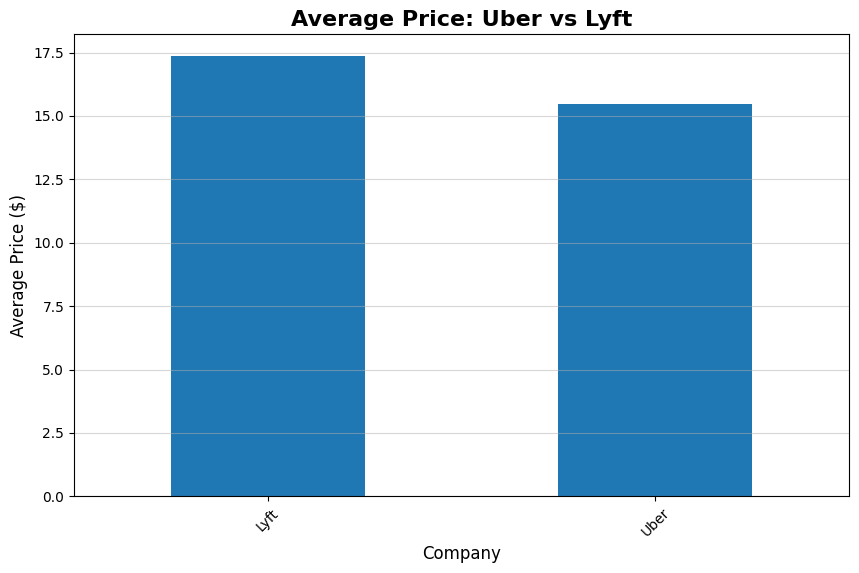

In [63]:
cab_type = merged.groupby('cab_type')['price'].mean()
plt.figure(figsize=(10,6))
cab_type.plot(kind='bar')
plt.title('Average Price: Uber vs Lyft', fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize = 12)
plt.ylabel('Average Price ($)', fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(axis='y', alpha=0.5)
plt.savefig('images/1_uber_vs_lyft.png', dpi=300, bbox_inches='tight')
plt.show()


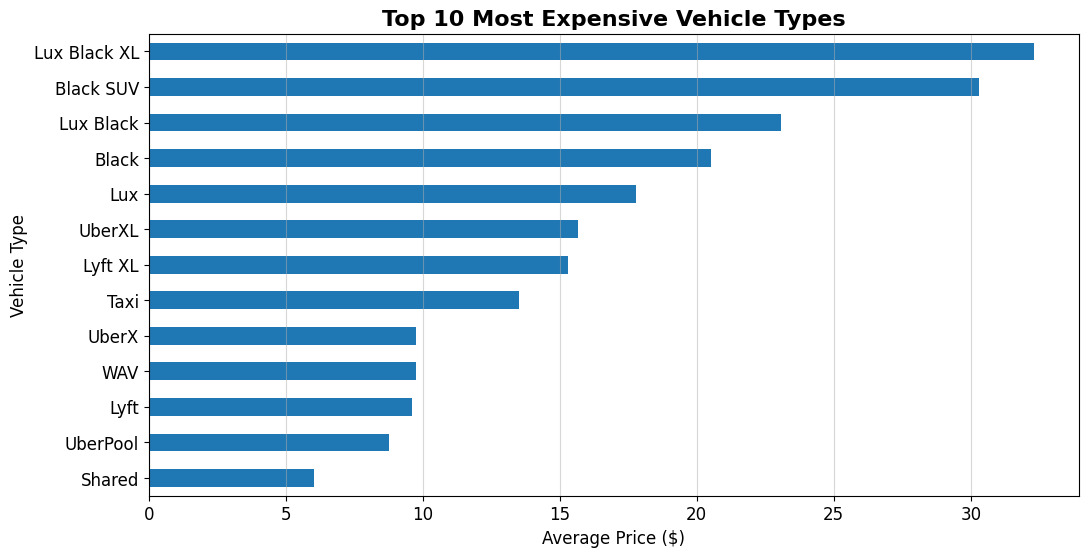

In [73]:
name = merged.groupby('name')['price'].mean().sort_values(ascending=True)
plt.figure(figsize=(12,6))
name.plot(kind='barh', fontsize=12)
plt.title('Top 10 Most Expensive Vehicle Types', fontsize=16, fontweight='bold')
plt.xlabel('Average Price ($)', fontsize = 12)
plt.ylabel('Vehicle Type', fontsize = 12)

plt.grid(axis='x', alpha=0.5)
plt.savefig('images/2_top_vehicles.png', dpi=300, bbox_inches='tight')
plt.show()

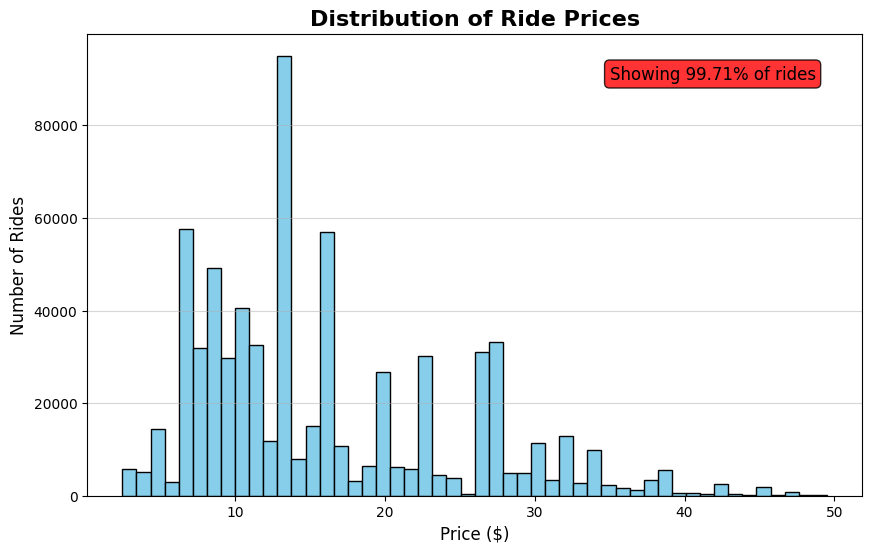

In [92]:
plt.figure(figsize=(10,6))
filtered = merged[merged['price'] <= 50]
filtered['price'].plot(kind='hist', bins= 50, edgecolor = 'black', color = 'skyblue')
plt.title('Distribution of Ride Prices', fontsize=16, fontweight='bold')
plt.xlabel('Price ($)', fontsize = 12)
plt.ylabel('Number of Rides', fontsize = 12)
percent = len(filtered) / len(merged) * 100
plt.text(35, 90000, f'Showing {percent:.2f}% of rides',fontsize=12, bbox=dict(boxstyle='round', facecolor='red', alpha=0.8))
plt.grid(axis='y', alpha=0.5)
plt.savefig('images/3_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [94]:
merged.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'year',
       'month', 'month_name', 'day', 'day_name', 'hour', 'temp', 'location',
       'clouds', 'pressure', 'rain', 'time_stamp_y', 'humidity', 'wind',
       'only hour'],
      dtype='str')

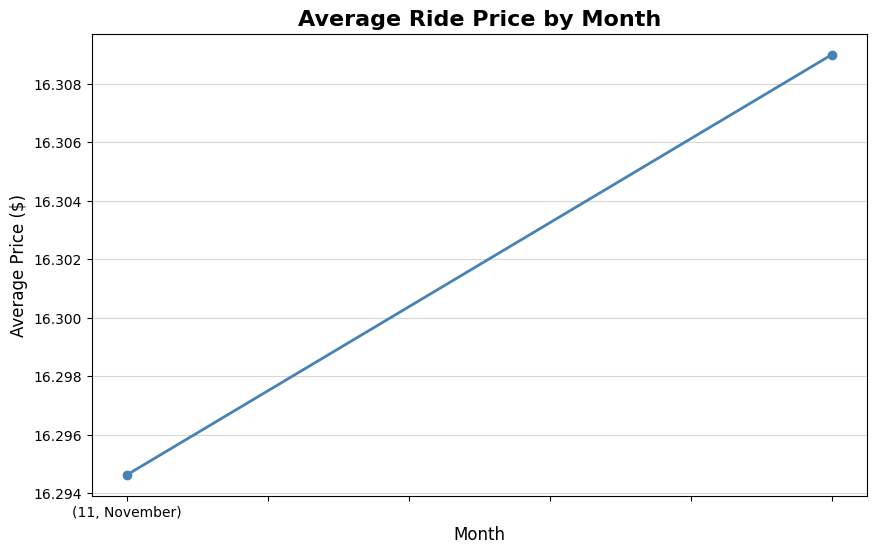

In [102]:
plt.figure(figsize=(10,6))
month = merged.groupby(['month','month_name'])['price'].mean()
month.plot(kind='line', marker='o', color='steelblue', linewidth=2)
plt.title('Average Ride Price by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Average Price ($)', fontsize = 12)


plt.grid(axis='y', alpha=0.5)
plt.savefig('images/4_price_by_month.png', dpi=300, bbox_inches='tight')
plt.show()

In [101]:
print(merged['month'].unique())
print(f"Уникальных месяцев: {merged['month'].nunique()}")

[12 11]
Уникальных месяцев: 2


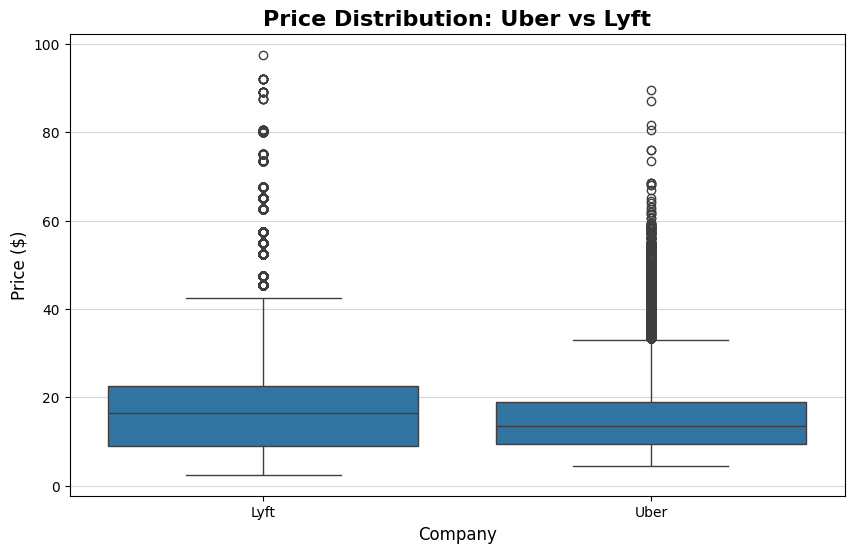

In [104]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=merged,
    x='cab_type',
    y='price',
    )
plt.title('Price Distribution: Uber vs Lyft', fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize = 12)
plt.ylabel('Price ($)', fontsize = 12)


plt.grid(axis='y', alpha=0.5)
plt.savefig('images/5_boxplot_uber_lyft.png', dpi=300, bbox_inches='tight')
plt.show()